In [11]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('whitegrid')
from matplotlib.ticker import ScalarFormatter

In [12]:
CONSTANT_NAME = "bad_init"

In [13]:
start =2
budget_list = []
for i in range(30):
    new_start = int(start * (1.5))
    if new_start - start > 500:
        start += 500
    else:
        start = new_start
    budget_list.append(start)
max_budget = budget_list[-1]

In [14]:
pdf_errors = {10:{}, 20:{}}
dt_list = {10:{}, 20:{}}
opt_res = {10:{}, 20:{}}
resolution_list = ["mfed_75", "mfed_early_75"]
resolution_list = ["mfed_90", "mfed_50","mfed_75", "mfed_early_75", "mfed", "mfed_early", 2,4,8]
resolution_list = ["mfed",2,4,8]
#resolution_list = ["mfed_early_90"]
resolution_list = ["mfed_early", "mfed_early_bad_init"]
melt_rate_list = [ (10,"low")]


tmp_dir = "bad_init_1"
for melt_rate,melt_label in melt_rate_list: #, "high"
    for resolution in resolution_list:
    #for resolution in [2,4,8,"mfed", "mfed_75", "mfed_early", "mfed_early_75"]: #, "mfed_75", , "mfed_50" #"mfed", "average", 2,4,8, "mfed_opt",
        tmp = pickle.load(open(f"./../assets/plots_data/fig_7/{tmp_dir}/{melt_label}_{resolution}.pkl", 'rb'))
        pdf_errors[melt_rate][resolution] = tmp["pdf_errors"][melt_rate]["mfed_early"]
        dt_list[melt_rate][resolution] = tmp["dt_list"][melt_rate]["mfed_early"]
        print(tmp.keys())
        try:
            opt_res[melt_rate][resolution] = tmp["opt_res"][melt_rate]["mfed_early"]
        except:
            pass
        #param_list.append()

dict_keys(['mean_errors', 'pdf_errors', 'dt_list', 'opt_res'])
dict_keys(['mean_errors', 'pdf_errors', 'dt_list', 'opt_res'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


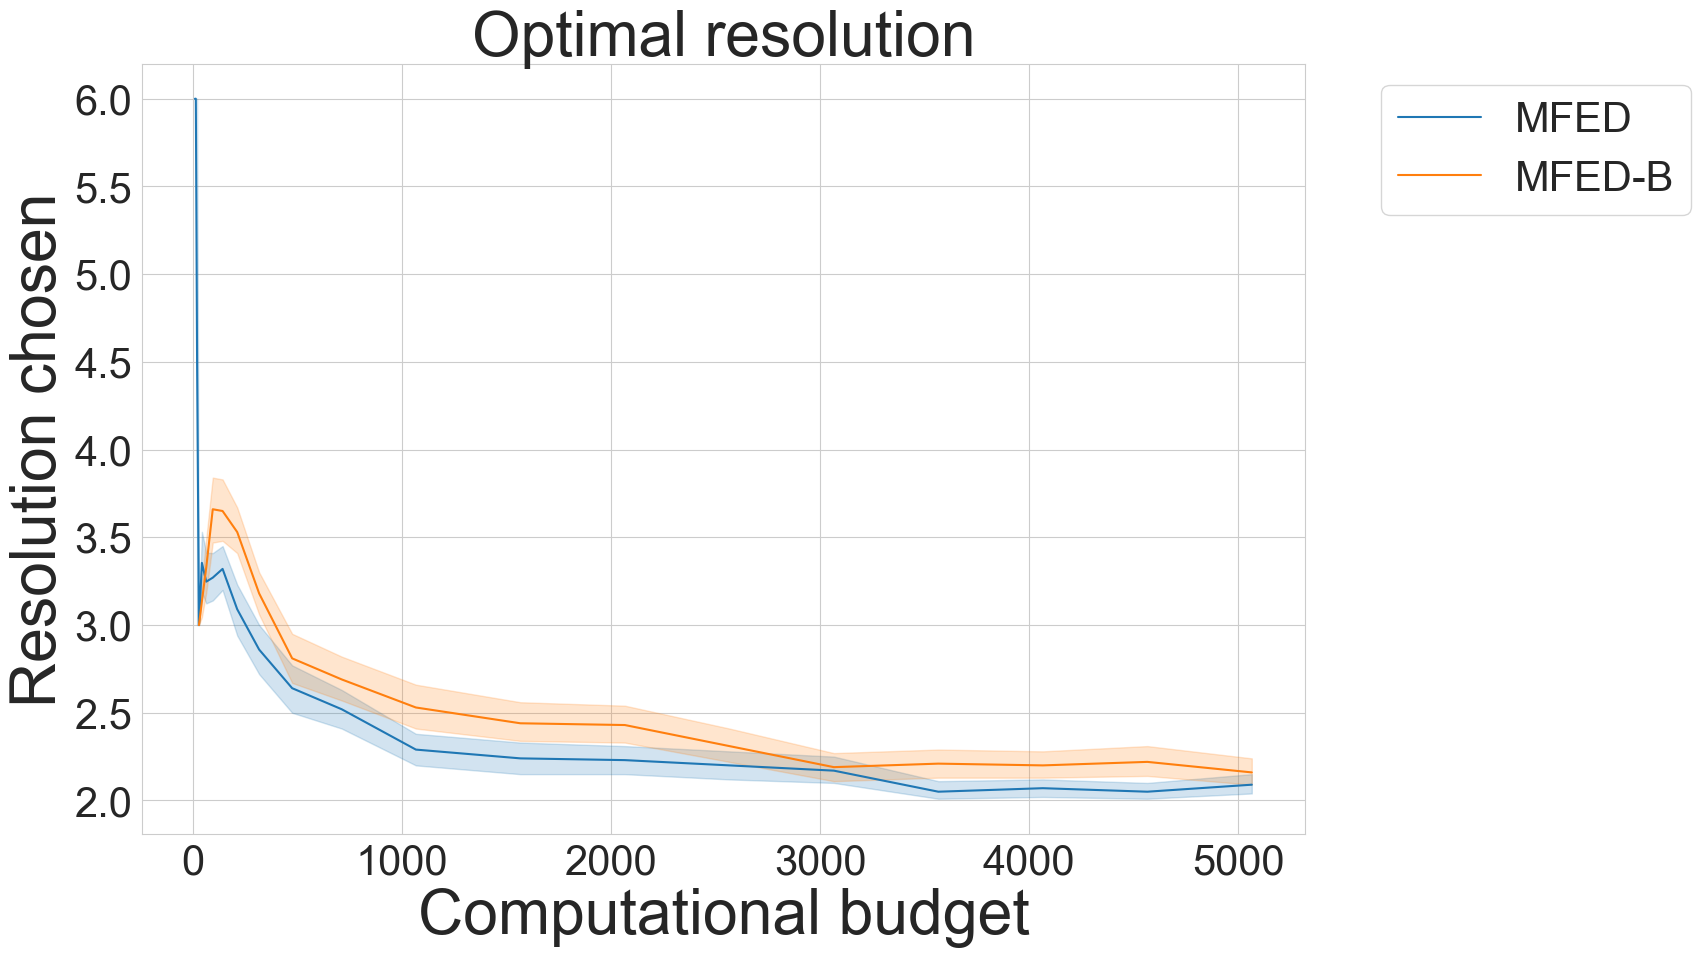

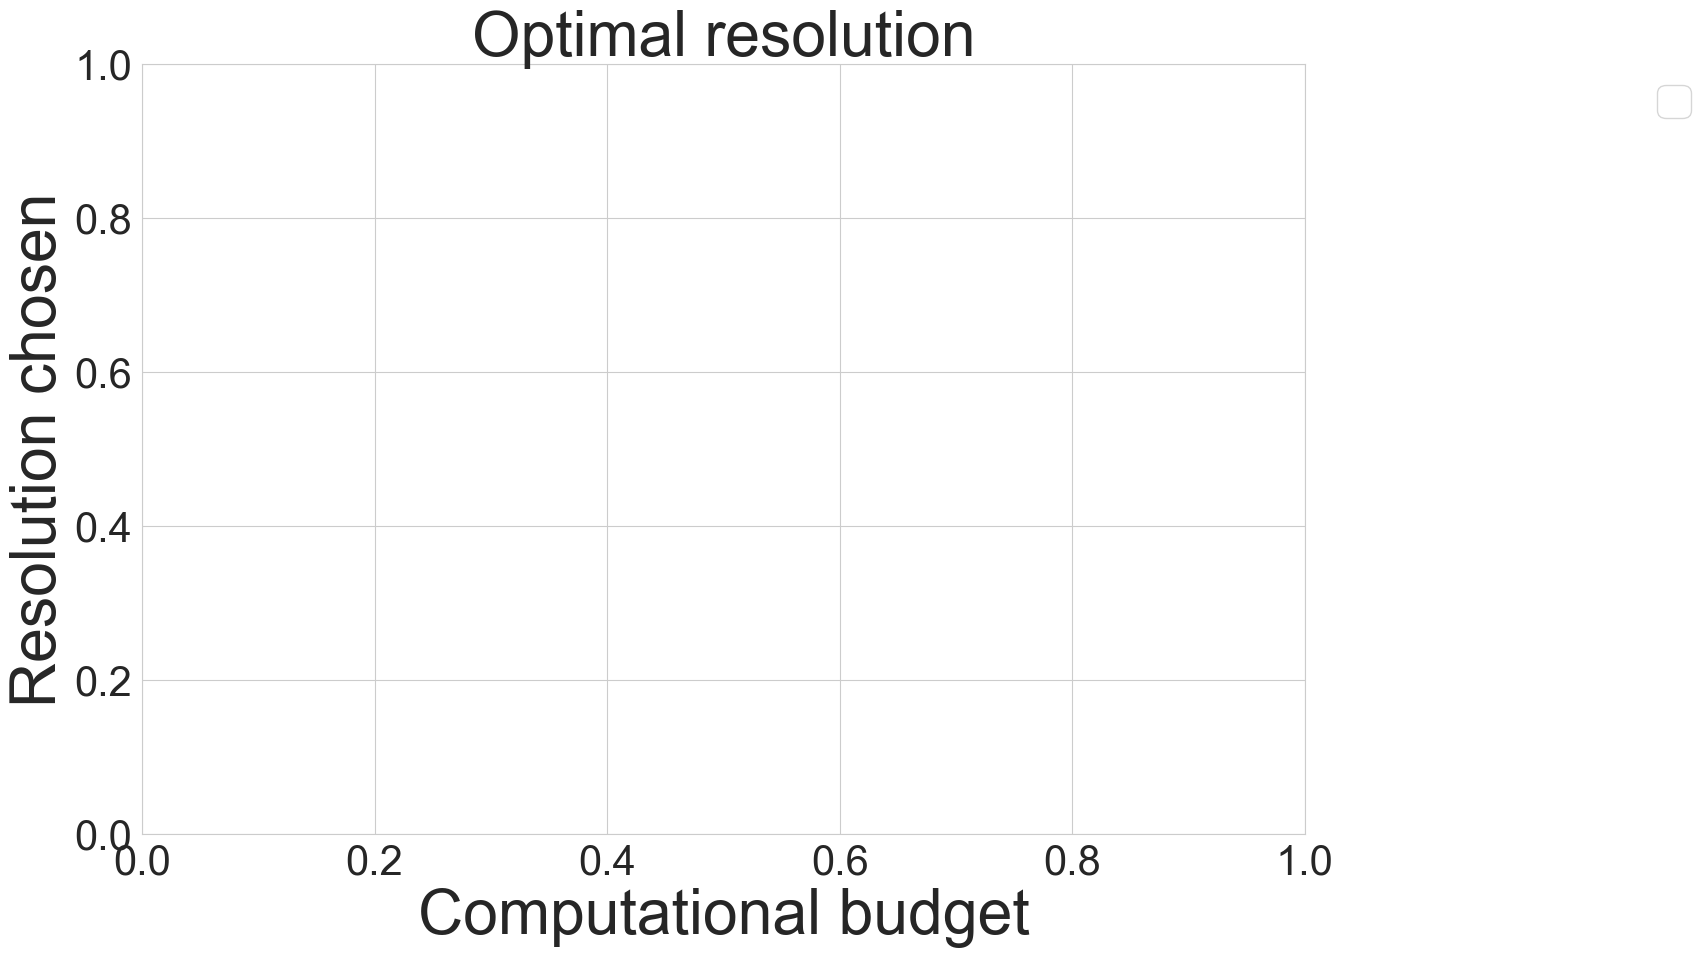

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    window = np.ones(window_size) / window_size
    padded_data = np.pad(data, (window_size//2, window_size//2), mode='edge')
    return np.convolve(padded_data, window, mode='valid')

data_for_df = []
for melt, _ in melt_rate_list:
    for res in resolution_list:
        tmp = opt_res[melt][res]
        y = []
        x = []
        for idx, budget in enumerate(budget_list):
            try:
                for n in tmp[budget]:
                    data_for_df.append({
                        "resolution": res,
                        "melt": melt,
                        "chosen_res": n,
                        "budget": budget,
                    })
            except:
                continue

for m in [10,20]:

    plt.figure(figsize=(15,10))
    df = pd.DataFrame(data_for_df)
    df_sub = df[df["melt"] == m]

    df_sub.loc[df_sub["resolution"] == "mfed_early", "resolution"] = "MFED"
    df_sub.loc[df_sub["resolution"] == "mfed_early_bad_init", "resolution"] = "MFED-B"


    sns.lineplot(df_sub,x="budget", y="chosen_res", hue="resolution")
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.xlabel("Computational budget", fontsize=45)
    plt.ylabel("Resolution chosen", fontsize=45)
    plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', fontsize=30, title_fontsize=45)
    plt.title(f"Optimal resolution", fontsize=45)
    path = f"./../assets/plots/thesis/init/lengthscale_{m}.pdf"
    plt.savefig(path,bbox_inches='tight')


